In [616]:
from datetime import date
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.api as sm
from scipy import interpolate

# Exercises

## 1. 

In [4]:
gafa_df = pd.read_csv("data/tsibbledata/gafa_stock.csv")
pbs_df = pd.read_csv("data/tsibbledata/PBS.csv")
velec_df = pd.read_csv("data/tsibbledata/vic_elec.csv")
pelt_df = pd.read_csv("data/tsibbledata/pelt.csv")

In [14]:
gafa_df.Date = pd.to_datetime(gafa_df.Date, format="%Y-%m-%d")

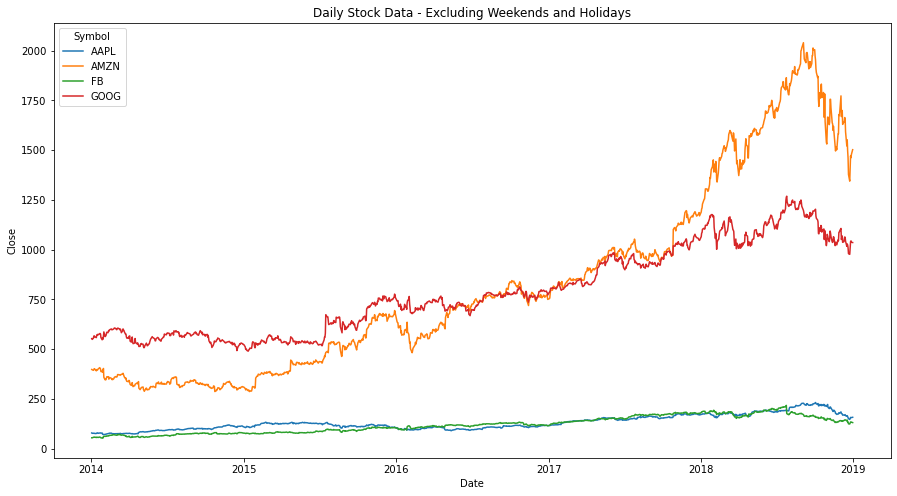

In [29]:
plt.figure(figsize=(15,8))
sns.lineplot(data=gafa_df, x="Date", y="Close", hue="Symbol").set(title="Daily Stock Data - Excluding Weekends and Holidays");

In [46]:
pbs_df.Month.replace({'Mär':'Mar', 'Mai':'May','Okt':'Oct','Dez':'Dec'}, regex=True, inplace=True)
pbs_df.Month = pd.to_datetime(pbs_df.Month, format="%Y %b")

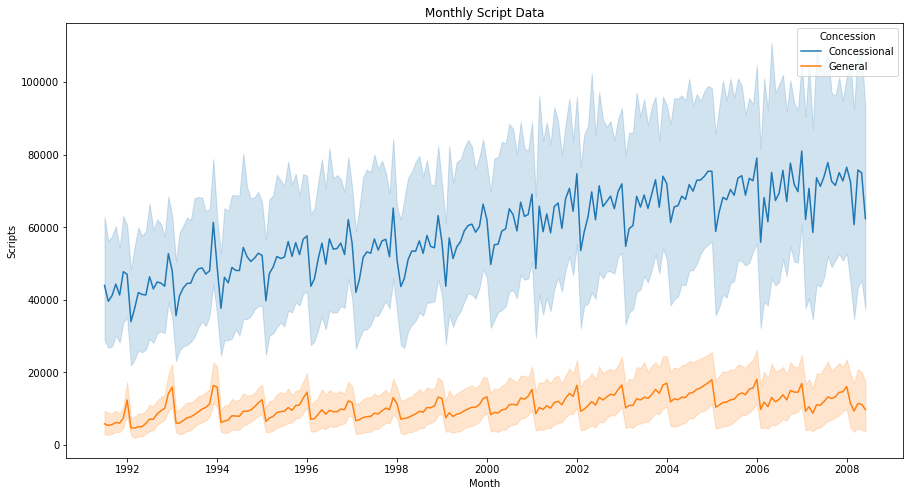

In [49]:
plt.figure(figsize=(15,8))
sns.lineplot(data=pbs_df, x="Month", y="Scripts", hue="Concession").set(title="Monthly Script Data");

In [162]:
velec_df.Time = pd.to_datetime(velec_df.Time, format="%Y-%m-%dT%H:%M:%SZ")
velec_df.Date = pd.to_datetime(velec_df.Date, format="%Y-%m-%d")

lo, hi = velec_df.Temperature.quantile(q=[.15, .9])
def grp_convert(val):
    if val.Temperature <= lo:
        return "Low"
    elif val.Temperature >= hi:
        return "High"
    elif val.Holiday:
        return "Holiday"
    else:
        return "Normal"
    
velec_df["Group"] = velec_df.apply(grp_convert, axis=1)

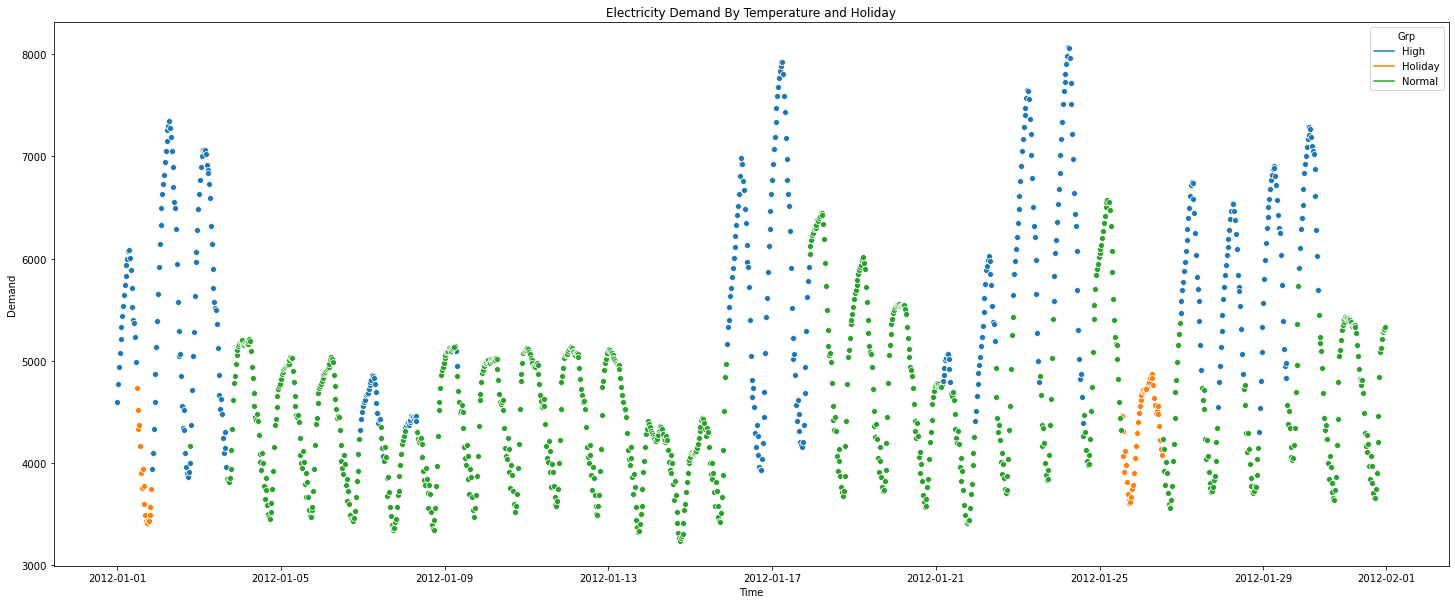

In [192]:
fig = plt.figure(figsize=(25,10))
(sns.lineplot(data=velec_df.query("Time.dt.year==2012 and Time.dt.month == 1"), 
              x="Time", y="Demand", hue="Grp", linestyle="None", marker='o'
             ).set(title="Electricity Demand By Temperature and Holiday")
);

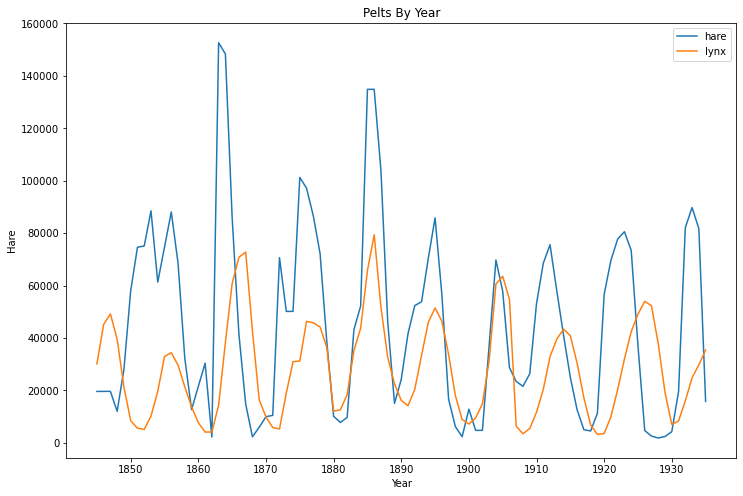

In [173]:
pelt_df.Year = pd.to_datetime(pelt_df.Year, format="%Y")
fig = plt.figure(figsize=(12, 8))

sns.lineplot(data=pelt_df, x="Year", y="Hare", label="hare")
sns.lineplot(data=pelt_df, x="Year", y="Lynx", label="lynx").set(title="Pelts By Year");

## 2.

In [182]:
gafa_df.loc[gafa_df.groupby("Symbol")['Close'].idxmax(), ["Symbol", "Date", "Close"]]

,Symbol,Date,Close
1197,AAPL,2018-10-03,232.070007
2434,AMZN,2018-09-04,2039.510010
3664,FB,2018-07-25,217.500000
4923,GOOG,2018-07-26,1268.329956


## 3.

In [184]:
tute_data_url = 'https://bit.ly/fpptute1'
tute_df = pd.read_csv(tute_data_url)

In [186]:
tute_df.Quarter = pd.to_datetime(tute_df.Quarter, format="%Y-%m-%d")
tute_df.head()

,Quarter,Sales,AdBudget,GDP
0,1981-03-01,1020.2,659.2,251.8
1,1981-06-01,889.2,589.0,290.9
2,1981-09-01,795.0,512.5,290.8
3,1981-12-01,1003.9,614.1,292.4
4,1982-03-01,1057.7,647.2,279.1


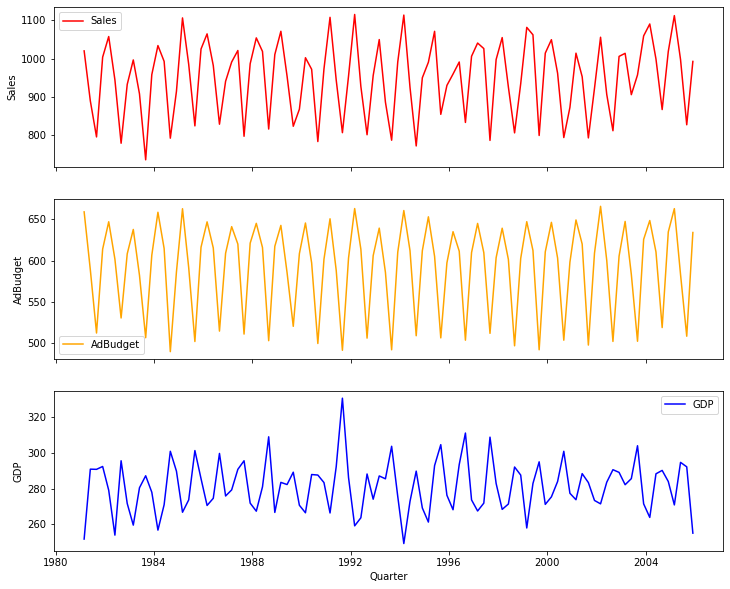

In [201]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
for ax, col in zip(axs.flatten(), [("Sales", "red"), ("AdBudget", "orange"), ("GDP", "blue")]):
    sns.lineplot(data=tute_df, x="Quarter", y=col[0], ax=ax, label=col[0], color=col[1])

## 7. 

In [202]:
aus_df = pd.read_csv("data/fpp3/aus_arrivals.csv")

In [215]:
aus_df.Quarter = pd.PeriodIndex(aus_df.Quarter.replace({" ": "-"}, regex=True), freq="Q")

In [266]:
aus_df["Q_Stamp"] = aus_df.Quarter.dt.to_timestamp()

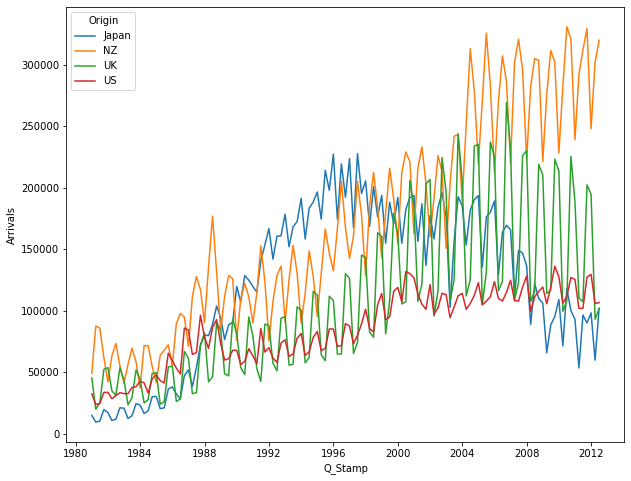

In [267]:
fig = plt.figure(figsize=(10,8))
sns.lineplot(data=aus_df, x="Q_Stamp", y="Arrivals", hue="Origin");

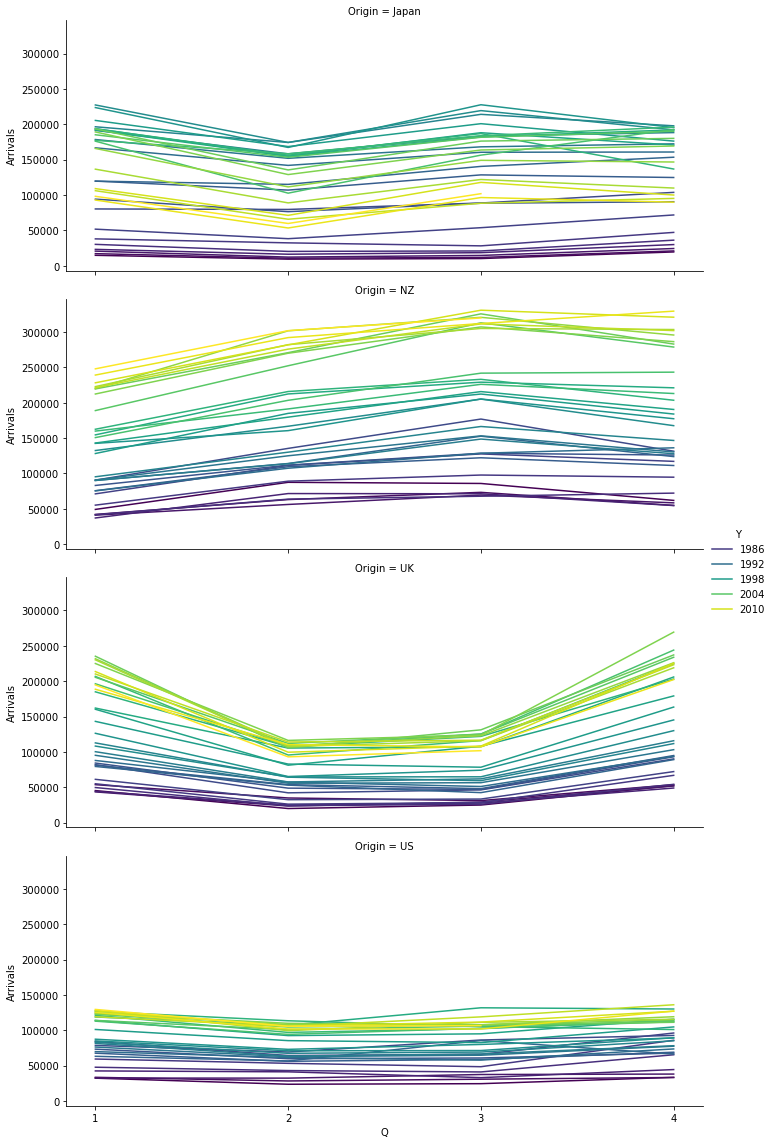

In [268]:
aus_df['Q'] = aus_df.Quarter.dt.quarter
aus_df.Q =aus_df.Q.astype(str)
aus_df['Y'] = aus_df.Quarter.dt.year
sns.relplot(data=aus_df, x="Q", y="Arrivals", hue="Y", kind="line", estimator=None, height=4, aspect=10/4, row="Origin", palette="viridis");

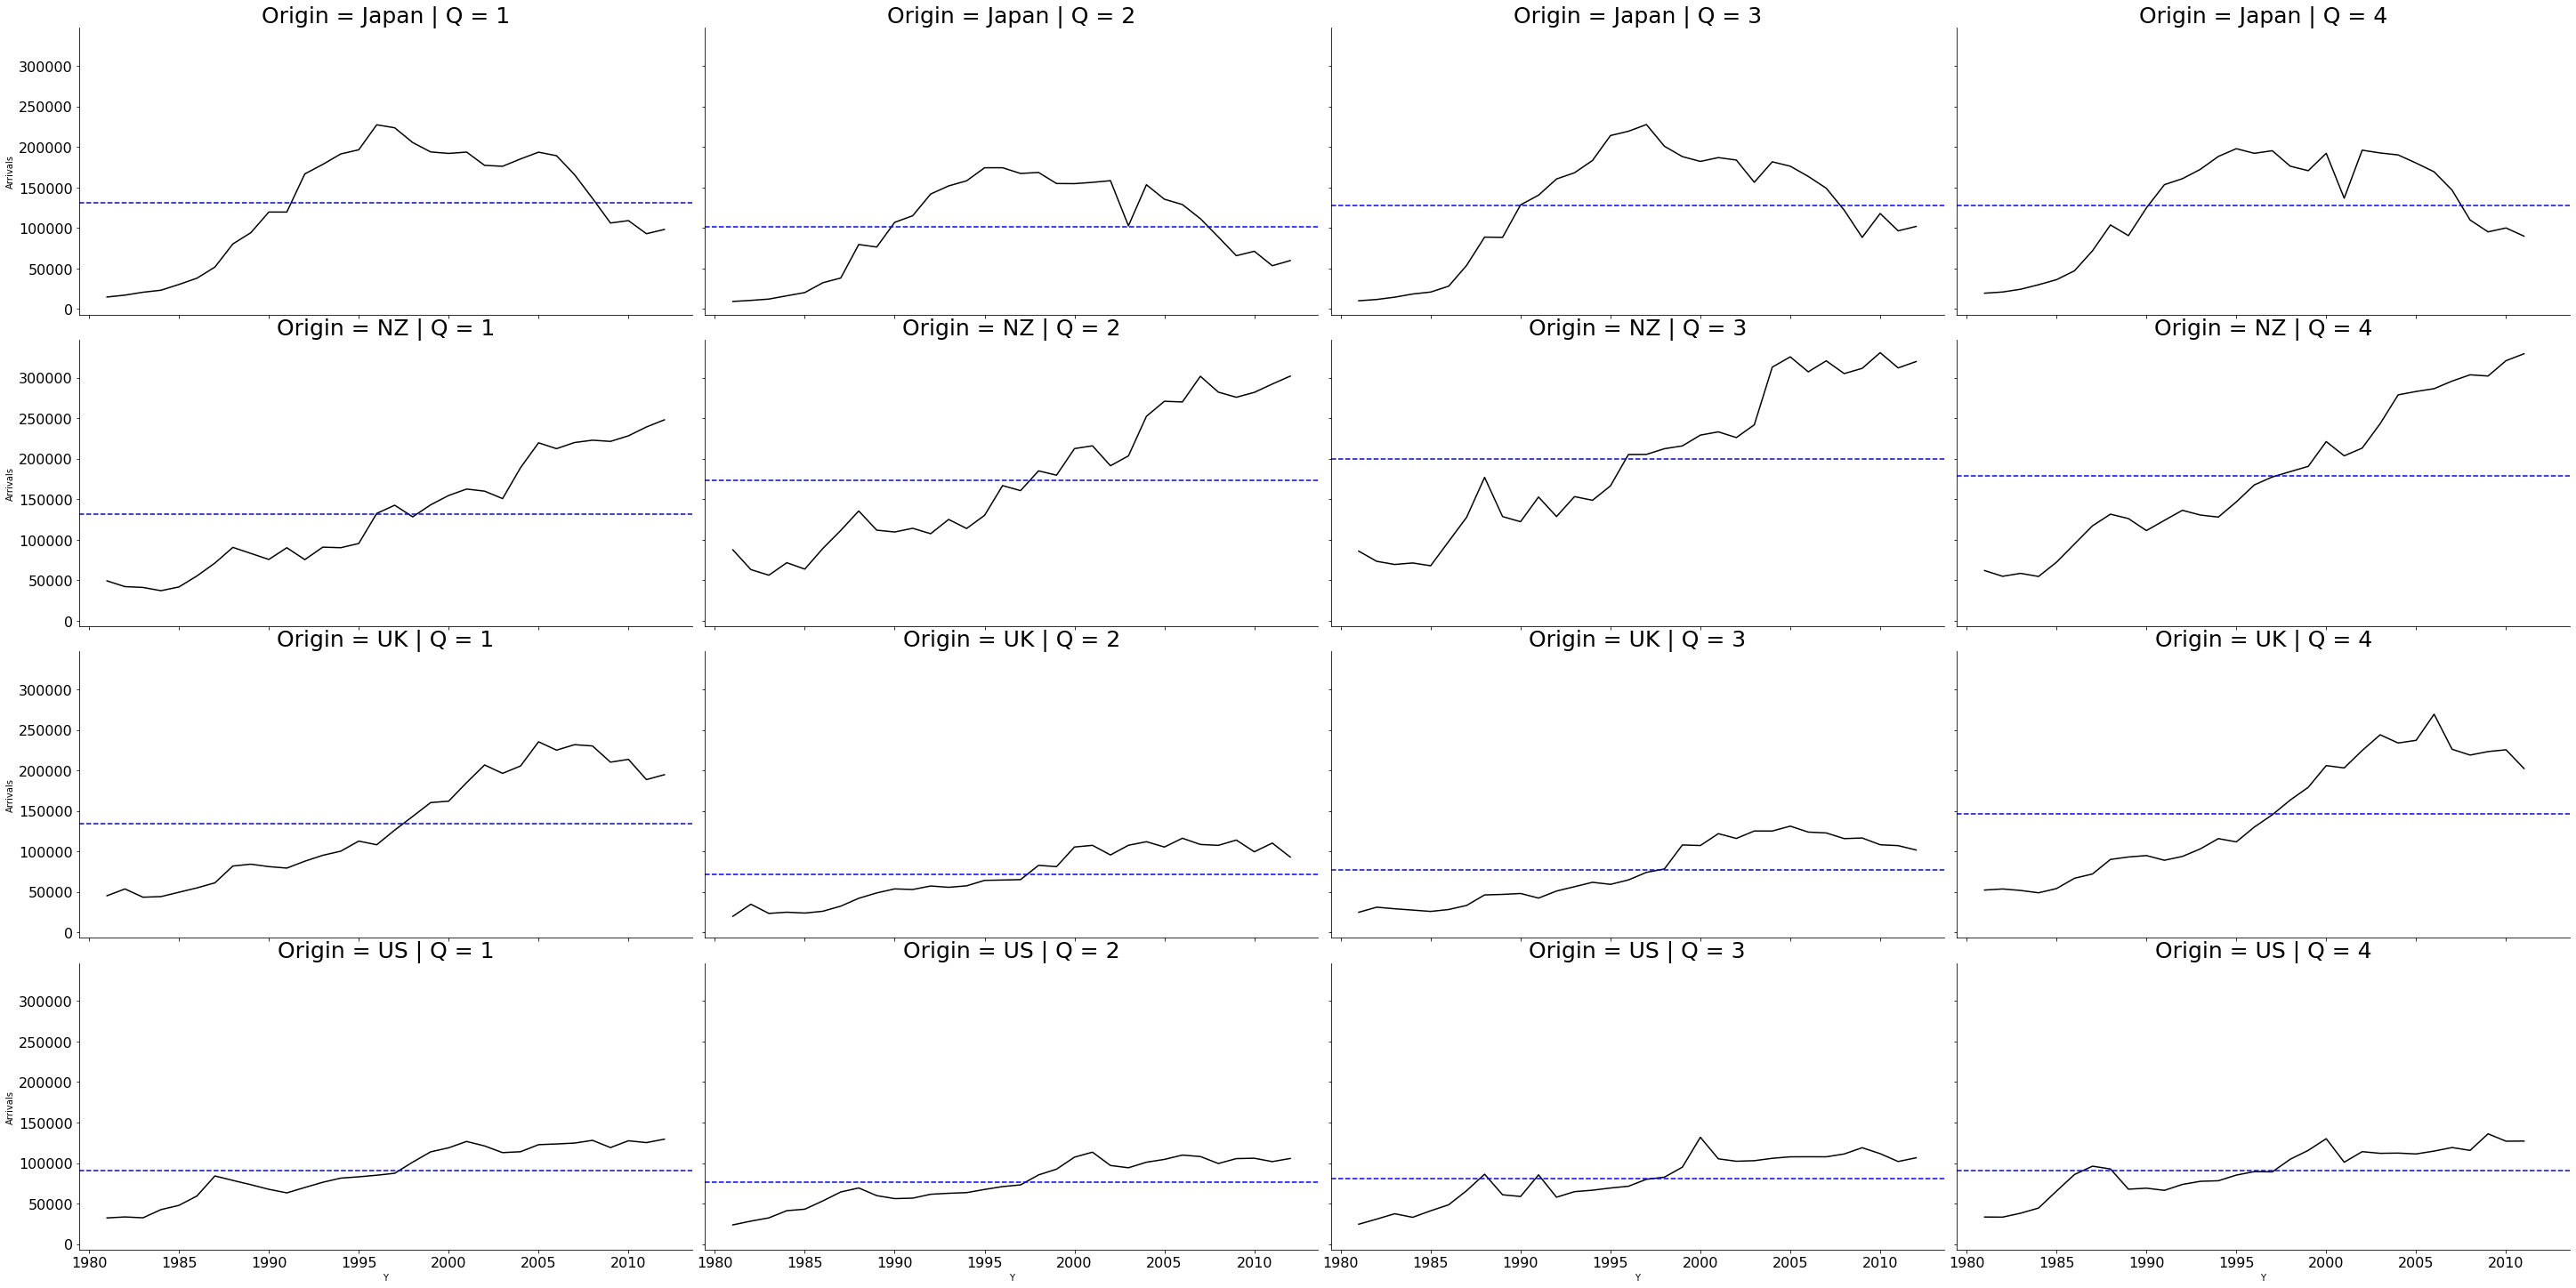

In [375]:
sub_plot = (sns.relplot(data=aus_df, x="Y", y="Arrivals", 
             kind="line", estimator=None, height=5, 
             aspect=10/5, col="Q", row="Origin", palette="viridis", color="black"
            )
)


for ax, fd in zip(sub_plot.axes.flatten(), sub_plot.facet_data()):
    txt = ax.title.get_text()
    ax.axhline(fd[1].Arrivals.mean(), color="blue", ls="--")
    ax.set_title(txt, fontsize=25)
    ylabels = [l.get_text() for l in ax.yaxis.get_ticklabels()]
    if len(ylabels) > 0:
        yticksloc = ax.get_yticks().tolist()
        ax.yaxis.set_major_locator(mticker.FixedLocator(yticksloc))
        ax.yaxis.set_ticklabels(ylabels, fontsize=16)
    
    xlabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    if len(xlabels) > 0:
        xticksloc = ax.get_xticks().tolist()
        ax.xaxis.set_major_locator(mticker.FixedLocator(xticksloc))
        ax.xaxis.set_ticklabels(xlabels, fontsize=16)
    

## 8.

In [496]:
aus_ret_df = pd.read_csv("data/tsibbledata/aus_retail.csv")

In [497]:
aus_ret_df.Month.replace({'Mär':'Mar', 'Mai':'May','Okt':'Oct','Dez':'Dec'}, regex=True, inplace=True)
year_err = aus_ret_df.loc[aus_ret_df.Month.str[:4].astype(int) > 2018]
aus_ret_df.drop(index=year_err.index, inplace=True)
aus_ret_df.Month = pd.to_datetime(aus_ret_df.Month, format="%Y %b")

In [523]:
sid = aus_ret_df["Series ID"].unique()[0]
sid2 = 'A3349767W'
aus_ret_ser = aus_ret_df.loc[aus_ret_df["Series ID"] == sid2, :]

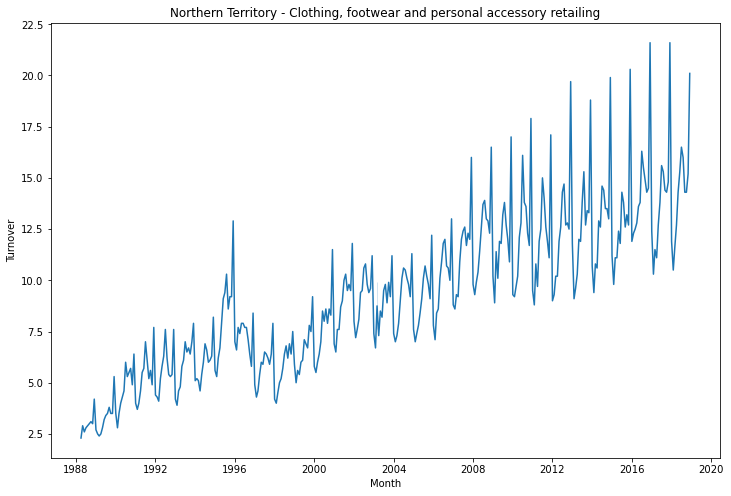

In [499]:
fig = plt.figure(figsize=(12,8))
sns.lineplot(data=aus_ret_ser, x="Month", y="Turnover").set(title=f"{aus_ret_ser.State.unique()[0]} - {aus_ret_ser.Industry.unique()[0]}");

In [524]:
aus_ret_ser = aus_ret_ser.assign(Year=aus_ret_ser.Month.dt.year,Mname=aus_ret_ser.Month.dt.month_name(), Mnum=aus_ret_ser.Month.dt.month)
aus_ret_ser.sort_values(by=["Year", "Mnum"], inplace=True)

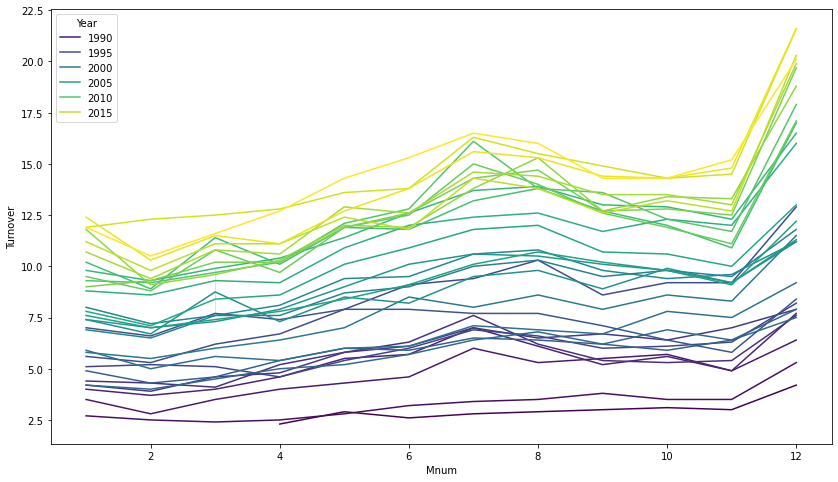

In [501]:
fig = plt.figure(figsize=(14,8))
sns.lineplot(data=aus_ret_ser, x="Mnum", y="Turnover", hue="Year", palette="viridis");

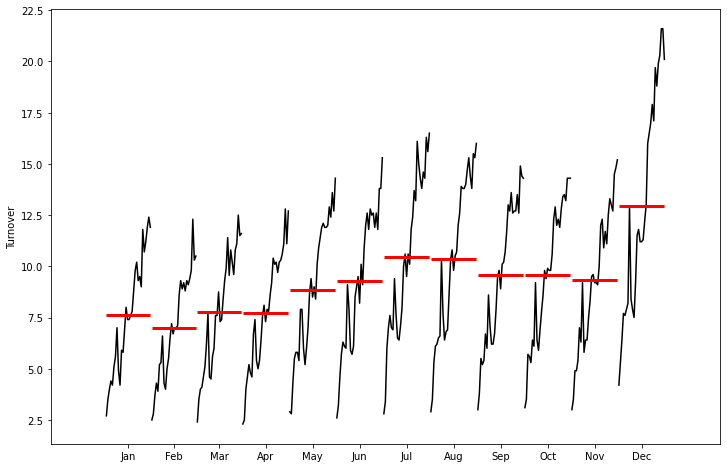

In [623]:
# There is a duplicate entry for 2003 March, so avererage them. There is also missing data for march 2010 - could extrapolate
aus_dedup = aus_ret_ser.groupby("Month", as_index=False).agg(Turnover=("Turnover", "mean"))
aus_ret_ser2 = (pd.merge(aus_ret_ser, aus_dedup, on="Month", suffixes=("_orig", "_dedup"))
                  .loc[:, ["State", "Industry", "Series ID", "Month", "Turnover_dedup"]]
                  .drop_duplicates())

d = aus_ret_ser2.set_index("Month").asfreq("MS")
data2010 = d.query("Month.dt.year == 2010").dropna()
f = interpolate.UnivariateSpline(x=data2010.index.month, y=data2010.Turnover_dedup.values)
march_val = f(3)
d.loc[d.index == '2010-03-01', "Turnover_dedup"] = march_val


fig, ax = plt.subplots(figsize=(12,8))
sm.graphics.tsa.month_plot(d.Turnover_dedup, ylabel="Turnover", ax=ax);

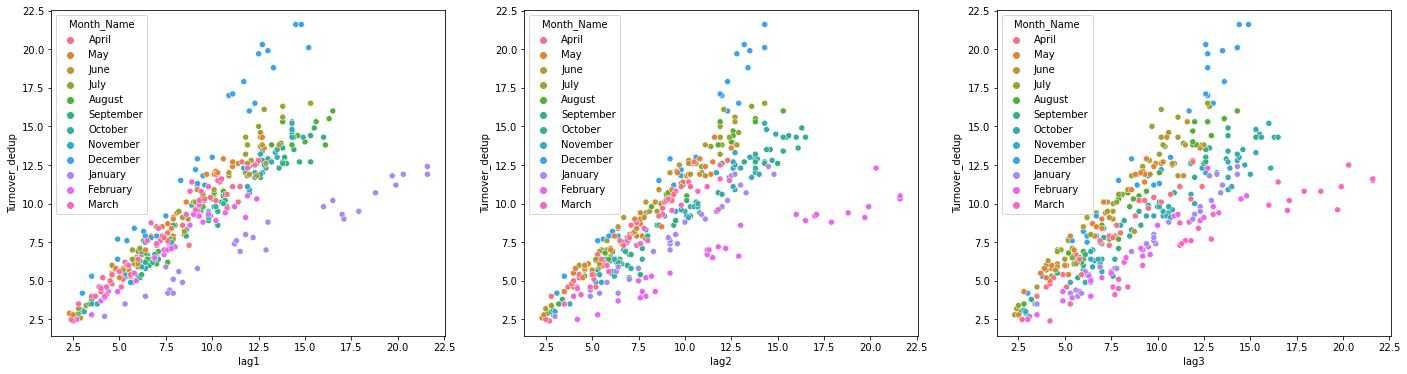

In [645]:
d2 = d.copy()
for i in range(1, 4):
    d2.loc[:, f"lag{i}"] = d2.Turnover_dedup.shift(i)

d2.loc[:, "Month_Name"] = d2.index.month_name()
fig, axs = plt.subplots(ncols=3, figsize=(24, 6))
for i, ax in zip(range(1, 4), axs.flatten()):
    sns.scatterplot(data = d2, y="Turnover_dedup", x=f"lag{i}", hue="Month_Name", ax=ax);

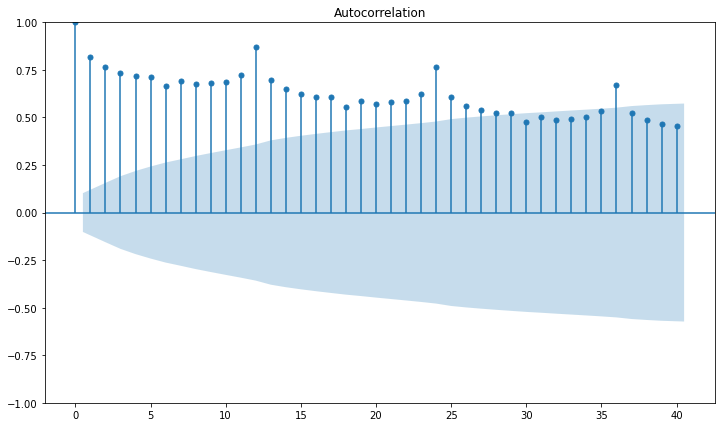

In [649]:
fig, ax = plt.subplots(figsize=(12, 7))

sm.graphics.tsa.plot_acf(d.Turnover_dedup, ax=ax, lags=40);